<a href="https://colab.research.google.com/github/atreyarawat123/trading-algos/blob/main/TradingAlgo_and_backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data 
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab

Saving AAPL.csv to AAPL.csv


In [4]:
aapl = pd.read_csv('AAPL.csv')
#Set the date as the index
aapl = aapl.set_index(pd.DatetimeIndex(aapl['Date'].values))
#Show the data
aapl

,Date,Open,High,Low,Close,Adj Close,Volume
2020-01-21,2020-01-21,79.297501,79.754997,79.000000,79.142502,78.464882,110843200
2020-01-22,2020-01-22,79.644997,79.997498,79.327499,79.425003,78.744957,101832400
2020-01-23,2020-01-23,79.480003,79.889999,78.912498,79.807503,79.124184,104472000
2020-01-24,2020-01-24,80.062500,80.832497,79.379997,79.577499,78.896149,146537600
2020-01-27,2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000
...,...,...,...,...,...,...,...
2021-01-13,2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800
2021-01-14,2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800
2021-01-15,2021-01-15,128.779999,130.220001,127.000000,127.139999,127.139999,111598500
2021-01-19,2021-01-19,127.779999,128.710007,126.940002,127.830002,127.830002,90296400


In [7]:
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
2020-01-21   0.000000
2020-01-22   0.003569
2020-01-23   0.004816
2020-01-24  -0.002882
2020-01-27  -0.029405
...               ...
2021-01-13   0.016227
2021-01-14  -0.015127
2021-01-15  -0.013731
2021-01-19   0.005427
2021-01-20   0.035477

[253 rows x 1 columns]
            Adj Close
2020-01-21        NaN
2020-01-22   0.003563
2020-01-23   0.004804
2020-01-24  -0.002886
2020-01-27  -0.029846
...               ...
2021-01-13   0.016096
2021-01-14  -0.015243
2021-01-15  -0.013826
2021-01-19   0.005412
2021-01-20   0.034862

[253 rows x 1 columns]


In [9]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
2020-01-21        NaN
2020-01-22   0.003569
2020-01-23   0.004816
2020-01-24  -0.002882
2020-01-27  -0.029405
...               ...
2021-01-13   0.016227
2021-01-14  -0.015127
2021-01-15  -0.013731
2021-01-19   0.005427
2021-01-20   0.035477

[253 rows x 1 columns]


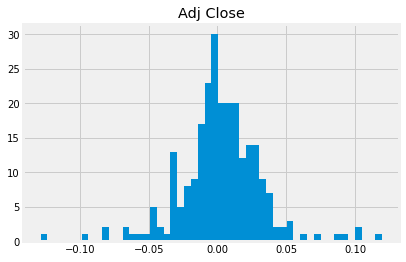

        Adj Close
count  252.000000
mean     0.002517
std      0.029691
min     -0.128647
25%     -0.011675
50%      0.001408
75%      0.017074
max      0.119808


In [10]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

print(daily_pct_c.describe())

In [11]:
# Calculate cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

print(cum_daily_return)

            Adj Close
2020-01-21        NaN
2020-01-22   1.003569
2020-01-23   1.008403
2020-01-24   1.005496
2020-01-27   0.975929
...               ...
2021-01-13   1.668135
2021-01-14   1.642901
2021-01-15   1.620343
2021-01-19   1.629136
2021-01-20   1.686933

[253 rows x 1 columns]


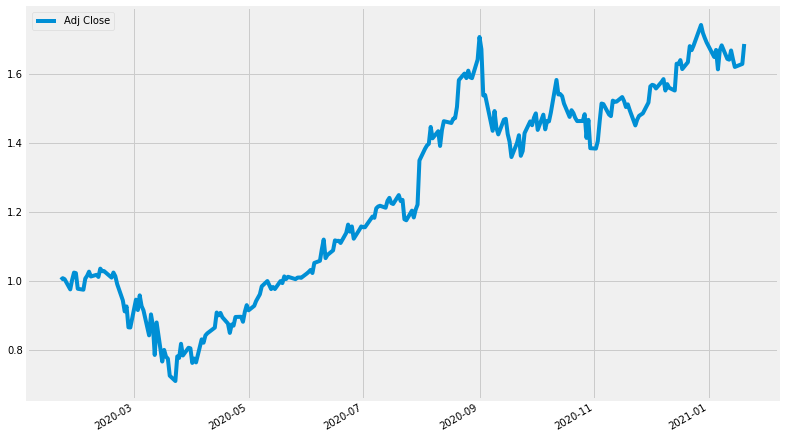

In [25]:

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [13]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

print(cum_monthly_return)

            Adj Close
2020-01-31   1.002780
2020-02-29   0.985090
2020-03-31   0.830991
2020-04-30   0.862472
2020-05-31   0.983545
2020-06-30   1.097910
2020-07-31   1.213663
2020-08-31   1.491876
2020-09-30   1.464693
2020-10-31   1.481079
2020-11-30   1.488398
2020-12-31   1.622260
2021-01-31   1.651381


In [14]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

moving_avg[-10:]

2021-01-06    123.801250
2021-01-07    124.166250
2021-01-08    124.568250
2021-01-11    124.805500
2021-01-12    125.045250
2021-01-13    125.336000
2021-01-14    125.551250
2021-01-15    125.745000
2021-01-19    125.990000
2021-01-20    126.333125
Name: Adj Close, dtype: float64

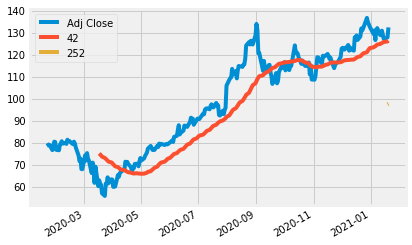

In [15]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()

plt.show()

In [18]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

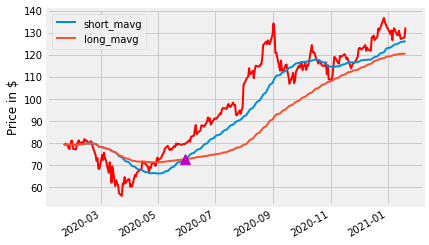

In [19]:
# Initialize the plot figure
fig = plt.figure()

ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

#Backtesting A Strategy


In [20]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

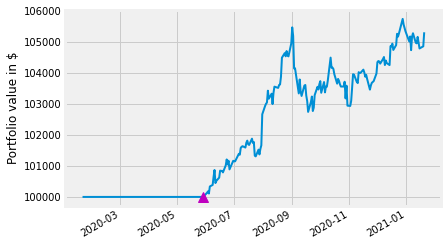

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [22]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)


1.5599585459780436


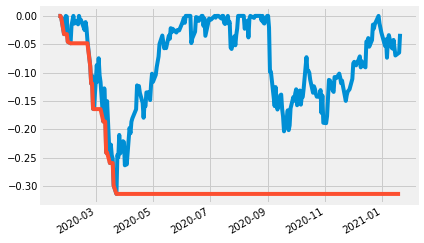

In [23]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [24]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)


0.6809331040716677
